# Libraries
Importing required libraries in this block

In [58]:
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import os
import soundfile as sf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# Preprocessing and Plotting
Data is preprocessed and its features are plotted in the following cells

## Plotting the data

We have 3 types of plots
*   Waveform - To show the similarities in the waveforms (amplitude time distribution of song and its remixes)
*   Frequency
*   MFCC - A graph of the comlpete 13 mfcc feature set for each frame of a clip

In [25]:
# Create plot
song1 = 'dataset/training/georgian-disco/out1000.mp3'
song2 = 'dataset/training/georgian-disco/out2000.mp3'
song3 = 'dataset/training/somebody-i-used-to-know/out000.mp3'
y1,sr1 = librosa.load(song1)
y2,sr2 = librosa.load(song2)
y3,sr3 = librosa.load(song3)

AttributeError: '_process_plot_var_args' object has no attribute 'prop_cycler'

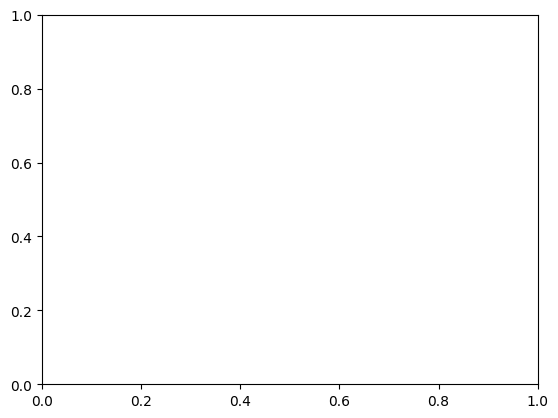

In [26]:
# Plot waveforms
librosa.display.waveshow(y=y1,sr=sr1)
librosa.display.waveshow(y=y2,sr=sr2)
librosa.display.waveshow(y=y3,sr=sr3)

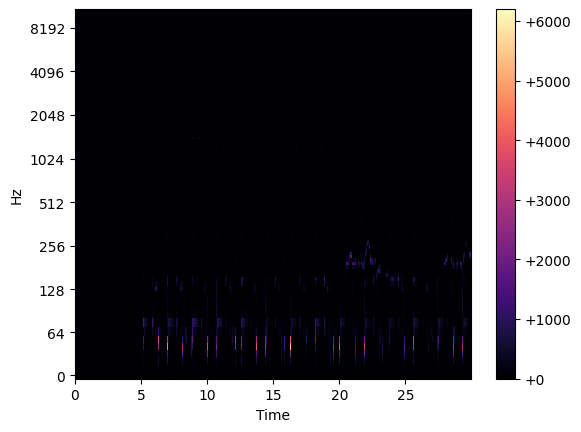

In [27]:
# plot spectrogram
FRAME_SIZE = 2048
HOP_SIZE = 512

y1_stft = librosa.stft(y1,n_fft=FRAME_SIZE,hop_length=HOP_SIZE)
y1_spect = np.abs(y1_stft)**2

y2_stft = librosa.stft(y2,n_fft=FRAME_SIZE,hop_length=HOP_SIZE)
y2_spect = np.abs(y2_stft)**2

y3_stft = librosa.stft(y3,n_fft=FRAME_SIZE,hop_length=HOP_SIZE)
y3_spect = np.abs(y3_stft)**2


librosa.display.specshow(y3_spect,sr=sr3,hop_length=HOP_SIZE,x_axis="time",y_axis="log")
plt.colorbar(format='%+2.f')

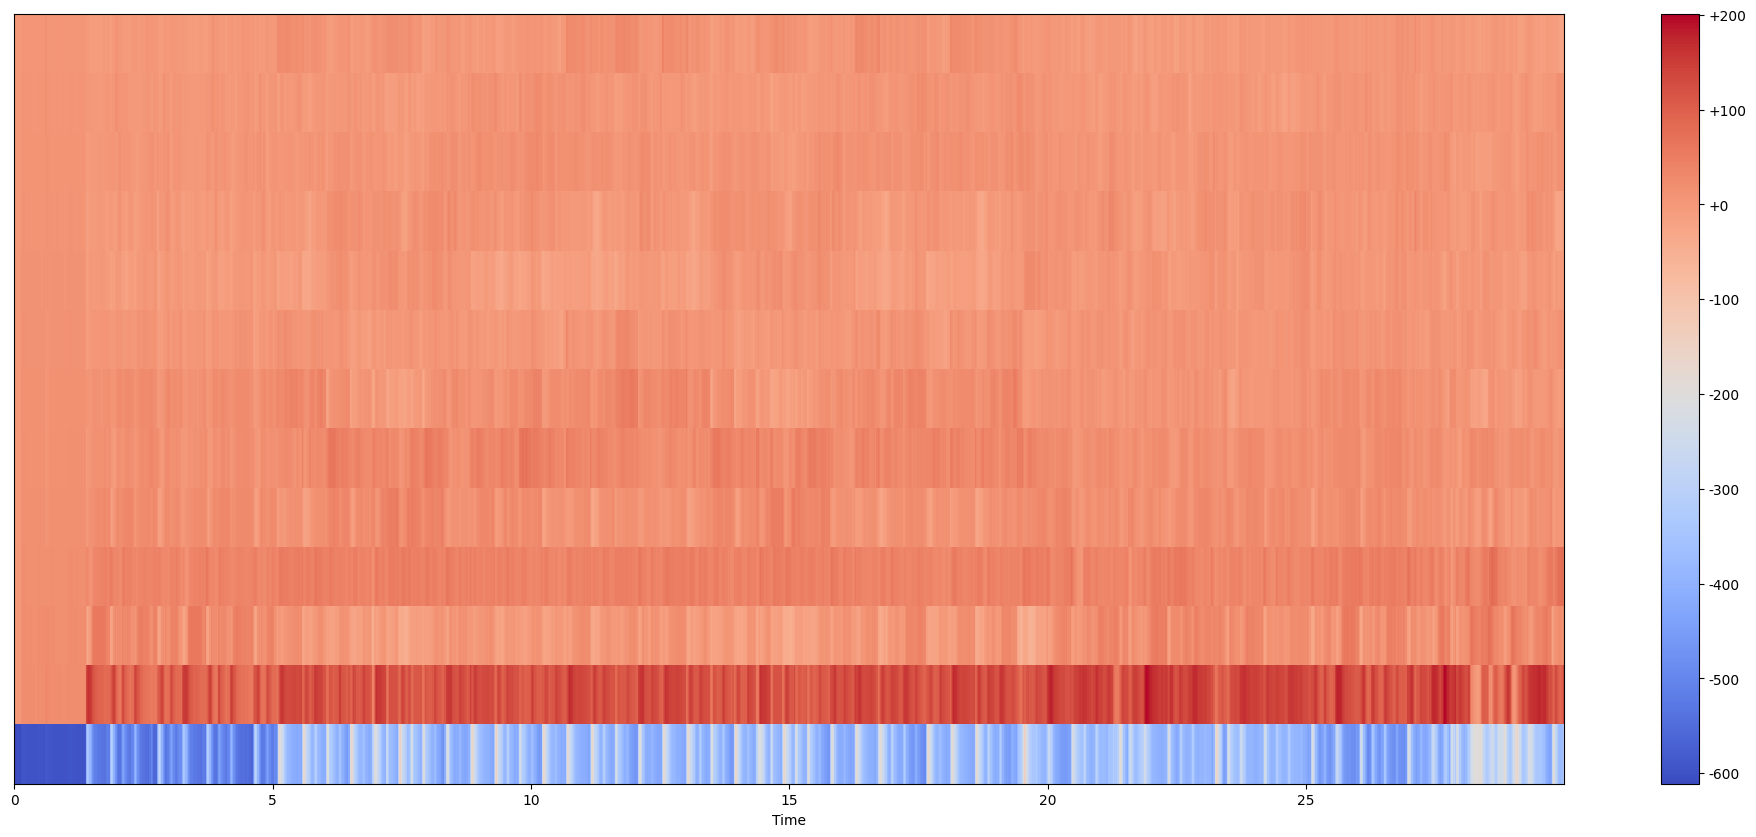

In [28]:
# plot mfccs
#mfcc1 = librosa.feature.mfcc(y=y1,n_mfcc=13,sr=sr1)
#mfcc2 = librosa.feature.mfcc(y=y2,n_mfcc=13,sr=sr2)
mfcc3 = librosa.feature.mfcc(y=y3,n_mfcc=13,sr=sr3)
plt.figure(figsize=(25,10))
librosa.display.specshow(mfcc3,x_axis="time",sr=sr3)
plt.colorbar(format='%+2.f')

## Preprocessing


*   Took different remixes of a song
*   Created 30 second clips of each version of each song
*   Extracted features using mfcc
*   Using 13 mfcc features, features extracted 1172 times per 30 second audio clip
*   waveform array resized to 60,000 to have consistent size
*   Used sparse labelling to label each song name
*   Input feature array is 2D (flattened from 3D) - numpy array
*   Output Label array is 1D - numpy array








In [29]:
count = 0
inputs = np.zeros((275,15236))
labels = []
k = 0
label_map = {}
label_rmap = {}
base_path = 'dataset/training/' # 'dataset/training/'
for song_folder in os.listdir(base_path):
    # song_folder will be used as class name/label
    for song in os.listdir(base_path+song_folder+'/'):
        song_path = base_path+song_folder+'/'+song
        signal,sr = librosa.load(song_path)
        signal = np.resize(signal,600000)
        print(count + 1, song_path)
        mfcc = librosa.feature.mfcc(y=signal,n_mfcc=13,sr=sr)
        inputs[count] = mfcc.flatten()
        labels.append(k)
        label_map[song_folder] = k
        label_rmap[k] = song_folder
        count+=1
    k += 1
print(count)

1 dataset/training/Atlantis/0000.mp3
2 dataset/training/Atlantis/0001.mp3
3 dataset/training/Atlantis/0002.mp3
4 dataset/training/Atlantis/0003.mp3
5 dataset/training/Atlantis/0004.mp3
6 dataset/training/Atlantis/0005.mp3
7 dataset/training/Atlantis/0006.mp3
8 dataset/training/Atlantis/1000.mp3
9 dataset/training/Atlantis/1001.mp3
10 dataset/training/Atlantis/1002.mp3
11 dataset/training/Atlantis/1003.mp3
12 dataset/training/Atlantis/1004.mp3
13 dataset/training/Atlantis/1005.mp3
14 dataset/training/Atlantis/1006.mp3
15 dataset/training/Atlantis/1007.mp3
16 dataset/training/Atlantis/2001.mp3
17 dataset/training/Atlantis/2002.mp3
18 dataset/training/Atlantis/2003.mp3
19 dataset/training/Atlantis/2004.mp3
20 dataset/training/Atlantis/2005.mp3
21 dataset/training/Atlantis/2006.mp3
22 dataset/training/Atlantis/3000.mp3
23 dataset/training/Atlantis/3001.mp3
24 dataset/training/Atlantis/3002.mp3
25 dataset/training/Atlantis/3003.mp3
26 dataset/training/Atlantis/3004.mp3
27 dataset/training/A

Shows a little bit about the size and contents of our training dataset

In [30]:
print(count)
print(inputs.shape)
labels = np.array(labels)
print(labels)

275
(275, 15236)
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8
  8  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10]


# Model Training and Testing

## Building the Model


*   Classifier Model to classify any input clip into one of the song it has been trained on
*   Using ReLU on hidden layers and Softmax on output layer for classification
*   Sparse Catergorical Loss function is used to calculate loss due to its ability to calculate 0/1 Loss given sparse vector
*   Normalization is used to scale outputs within acceptable range
*   Scheduler to reduce learning rate to prevent overstepping
*   Early callback to check when model is trained earlier than max iterations and restore best weights







In [31]:
model = Sequential([
        Input(shape=(inputs.shape[1],)), #creates input layer, no of nodes = no of inputs = 179
        Dense(256, activation='relu'), #1st hidden layer with 256 neurons
        BatchNormalization(), #normalize the output value so that input to next layer is normalized
        # Dropout(0.3), #this is to prevent overfitting but my results are way better without it atm - will use if i have problems on test data
        Dense(128, activation='relu'),
        BatchNormalization(),
        # Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        # Dropout(0.3),
        Dense(len(np.unique(labels)), activation='softmax')
    ])

In [32]:
# Define learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch != 0:
        lr = lr * 0.9 # decreases the learning rate by a factor of 0.9 every 10 epochs - prevent over stepping
    return lr

# Implement learning rate scheduler
lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

In [33]:
# Implement early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10, #if 'val_loss' does not improve in 10 iterations then stop
    restore_best_weights=True # use best found weights
)

In [34]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy',#use 0/1 (fancy name sem thing)
              optimizer=Adam(), # adam optimizer - instead of sgd for classification - sgd is better for regression
              metrics=['accuracy']) , # print accuracy after fixed interval

(None,)

In [35]:
# Train the model
history = model.fit(inputs, # inputs
                    labels, # expected outputs
                    epochs=100, # max number of times to traverse over training data for learning
                    batch_size=32, # give inputs in batches of 32 - why u ask? - see this link: https://youtu.be/TEWy9vZcxW4?list=PLQVvvaa0QuDcjD5BAw2DxE6OF2tius3V3&t=302
                    callbacks=[lr_scheduler_callback]) # integrates functions upar wle into our training

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.2543 - loss: 2.5303 - learning_rate: 0.0010
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7817 - loss: 0.9518 - learning_rate: 0.0010
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9349 - loss: 0.4808 - learning_rate: 0.0010
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9821 - loss: 0.3209 - learning_rate: 0.0010
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9777 - loss: 0.2543 - learning_rate: 0.0010
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 0.1180 - learning_rate: 0.0010
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9965 - loss: 0.0989 - learning_rate: 0.0010
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 0.0865 - learning_rate: 0.0010
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9897 - loss: 0.0745 - learning_rate: 0.0010
Epoch 10/100
9/9 ━━━━━━━━━━━

## Testing the Model
*   Processed the test audio clips in the same way
*   Printed the data (input/label) for visualization
*   Evaluated the data on trained model and printed the accuracy





In [36]:
# Test the model
count = 0
test_inputs = np.zeros((11,15236))
test_labels = []
k = 0
base_path = 'dataset/testing/' # 'dataset/testing/'
for song_folder in os.listdir(base_path):
    # song_folder will be used as class name/label
    for song in os.listdir(base_path+song_folder+'/'):
        song_path = base_path+song_folder+'/'+song
        signal,sr = librosa.load(song_path)
        signal = np.resize(signal,600000)
        print(song_path)
        mfcc = librosa.feature.mfcc(y=signal,n_mfcc=13,sr=sr)
        test_inputs[count] = mfcc.flatten()
        test_labels.append(label_map[song_folder])
        count+=1
    k += 1
print(count)

dataset/testing/Atlantis/2000.mp3
dataset/testing/Babydoll/2003.mp3
dataset/testing/dadada/out3000.mp3
dataset/testing/dancing/out1000.mp3
dataset/testing/Dead Inside/1001.mp3
dataset/testing/georgian-disco/out3004.mp3
dataset/testing/In My Mind/1002.mp3
dataset/testing/La-Espada/out2005.mp3
dataset/testing/metamorphosis/out3001.mp3
dataset/testing/shadow-lady/out3006.mp3
dataset/testing/somebody-i-used-to-know/out2002.mp3
11


In [37]:
print(test_labels)
print(label_map)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
{'Atlantis': 0, 'Babydoll': 1, 'dadada': 2, 'dancing': 3, 'Dead Inside': 4, 'georgian-disco': 5, 'In My Mind': 6, 'La-Espada': 7, 'metamorphosis': 8, 'shadow-lady': 9, 'somebody-i-used-to-know': 10}


In [38]:
print("Evaluate on test data")
results = model.evaluate(test_inputs, np.array(test_labels), batch_size=7)
print("test loss, test acc:", results)
y = model.predict(test_inputs)
for row in y:
  print(label_rmap[np.argmax(row)])

Evaluate on test data
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.3133 
test loss, test acc: [0.35616743564605713, 1.0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
Atlantis
Babydoll
dadada
dancing
Dead Inside
georgian-disco
In My Mind
La-Espada
metamorphosis
shadow-lady
somebody-i-used-to-know


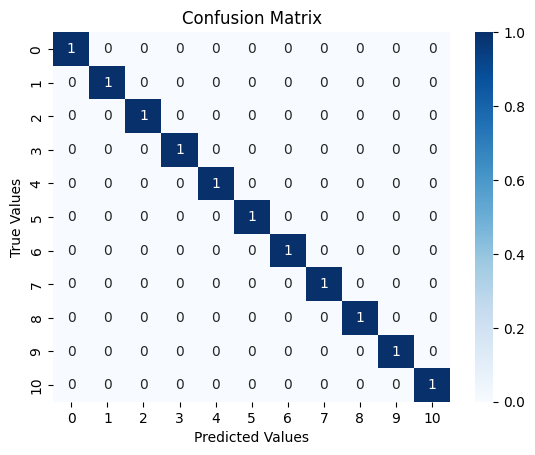

In [66]:
# print(test_labels)
y_labels = np.argmax(y, axis = 1)
# print(y_labels)
cm = confusion_matrix(test_labels, y_labels)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Confusion Matrix")
plt.show()

In [67]:
print(f"Accuracy: {accuracy_score(test_labels,y_labels)}")
print(f"Precision: {precision_score(test_labels, y_labels, average='macro')}") #  In macro-averaging, we compute the metric independently for each class and then take the average across all classes.
print(f"Recall: {recall_score(test_labels, y_labels, average='macro')}")
print(f"F1 Score: {f1_score(test_labels,y_labels, average='macro')}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [68]:
model.save('Song_Predictor.keras') # to save the trained model for deployment - can be .h5 as well but it gives warning: is legacy